# Projeect Title
## **Air Quality Index Prediction**

# **Problem Statement**
Information on air quality is frequently very unclear, which makes it challenging for peoples to respond to pollution flows. Data on air quality is accessible, but it typically absences the specifics required to identify patterns as take preventative action. That is the issue what we seek to resolve by our project. By developing a model that forecasts the quality of the air in Karachi. The system's precise daily projections can aid people, and the officials in better understanding pollution patterns and implementing effective responses.

# **Business Question**

1. How does air quality vary over time (daily, monthly, or annually)?
2. Is there specific months when pollution levels are consistently higher?
3. Is there specific season when pollution levels are consistently higher?
4. Is there specific time of day when pollution levels are consistently higher?
5. Which pollutants have the most significant impact on AQI (e.g., PM2.5, PM10, CO, NO2)?
6. What are the primary sources of the key pollutants?
7. Which geographical areas or regions have the highest AQI levels?
8. How do these areas compare to others in terms of pollutant levels?
9. Can the model accurately predict future AQI levels to help authorities and individuals prepare for poor air quality days?
10. What are the expected AQI levels for the next week or month?
11. How has air quality changed in response to government policies or events (e.g., lockdowns, environmental regulations)?
12. Are specific measures (e.g., vehicle restrictions, industrial regulations) reducing AQI levels effectively?
13. How many days per year are categorized as "unhealthy" or worse according to AQI standards?
14. What steps can individuals take to minimize exposure during periods of poor air quality?
15. Can the model identify early warning signs for significant pollution events?
16. How does weather (e.g., temperature, humidity) influence pollutant levels and AQI?
17. Can this prediction model help in raising awareness and guiding community actions to improve air quality?
18. How can the results be integrated into apps or public dashboards to inform citizens?
19. What is the average AQI and pollution level in Karachi for each day of the week based on the provided dataset?








In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('ahmedabad_aqi.csv')


In [28]:
data.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [29]:
data.shape

(108035, 16)

In [30]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108035 entries, 0 to 108034
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   StationId   108035 non-null  object 
 1   Date        108035 non-null  object 
 2   PM2.5       86410 non-null   float64
 3   PM10        65329 non-null   float64
 4   NO          90929 non-null   float64
 5   NO2         91488 non-null   float64
 6   NOx         92535 non-null   float64
 7   NH3         59930 non-null   float64
 8   CO          95037 non-null   float64
 9   SO2         82831 non-null   float64
 10  O3          82467 non-null   float64
 11  Benzene     76580 non-null   float64
 12  Toluene     69333 non-null   float64
 13  Xylene      22898 non-null   float64
 14  AQI         87025 non-null   float64
 15  AQI_Bucket  87025 non-null   object 
dtypes: float64(13), object(3)
memory usage: 13.2+ MB


In [32]:
data.isnull().sum()

,0
StationId,0
Date,0
PM2.5,21625
PM10,42706
NO,17106
NO2,16547
NOx,15500
NH3,48105
CO,12998
SO2,25204


In [33]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.median()))


In [34]:
data.sort_values('Date', inplace=True)
data.interpolate(method='linear', inplace=True)


<ipython-input-34-ba387a5dd913>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='linear', inplace=True)


In [35]:
data.drop(columns=['Xylene'], inplace=True)

# Data Cleaning

In [36]:
# Data Cleaning
def clean_data(data):
    """Cleans the dataset by handling missing values and invalid data."""
    # Convert 'Date' to datetime format
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Handle missing values in numeric columns by filling with median
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.median()))

    # Drop rows with invalid dates
    data.dropna(subset=['Date'], inplace=True)

    # Reset index after cleaning
    data.reset_index(drop=True, inplace=True)

    return data

data = clean_data(data)

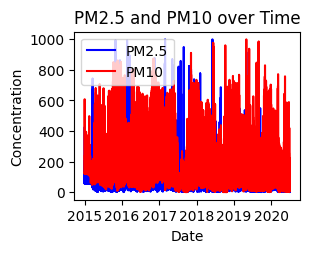

In [37]:
# Time Series Plots for PM2.5, PM10, NO, NO2, O3, CO
plt.subplot(2, 2, 1)
plt.plot(data['Date'], data['PM2.5'], label='PM2.5', color='blue')
plt.plot(data['Date'], data['PM10'], label='PM10', color='red')
plt.title('PM2.5 and PM10 over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()


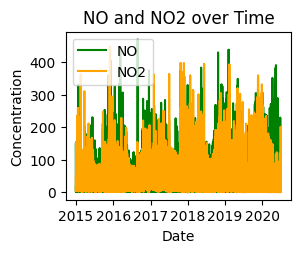

In [38]:
plt.subplot(2, 2, 2)
plt.plot(data['Date'], data['NO'], label='NO', color='green')
plt.plot(data['Date'], data['NO2'], label='NO2', color='orange')
plt.title('NO and NO2 over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()

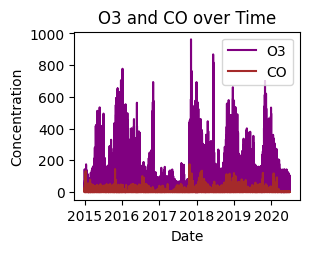

In [39]:
plt.subplot(2, 2, 3)
plt.plot(data['Date'], data['O3'], label='O3', color='purple')
plt.plot(data['Date'], data['CO'], label='CO', color='brown')
plt.title('O3 and CO over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()

In [40]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

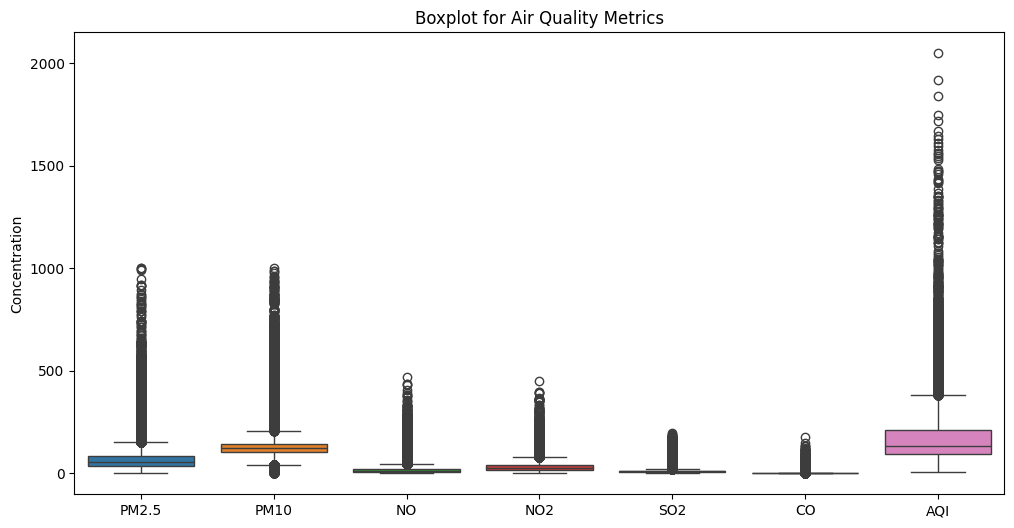

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'AQI']])
plt.title('Boxplot for Air Quality Metrics')
plt.ylabel('Concentration')
plt.show()

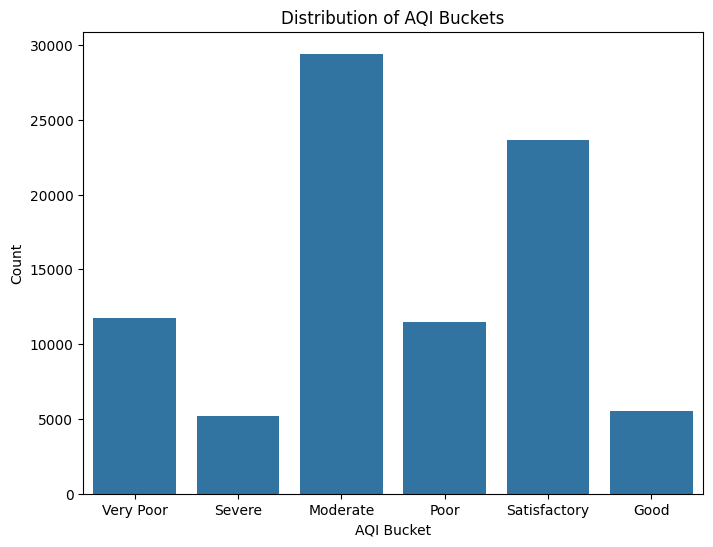

In [42]:
# AQI distribution (if you want to see how AQI is distributed in terms of buckets)
plt.figure(figsize=(8, 6))
sns.countplot(x='AQI_Bucket', data=data)
plt.title('Distribution of AQI Buckets')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

# Exploratory Data Analysis (EDA)


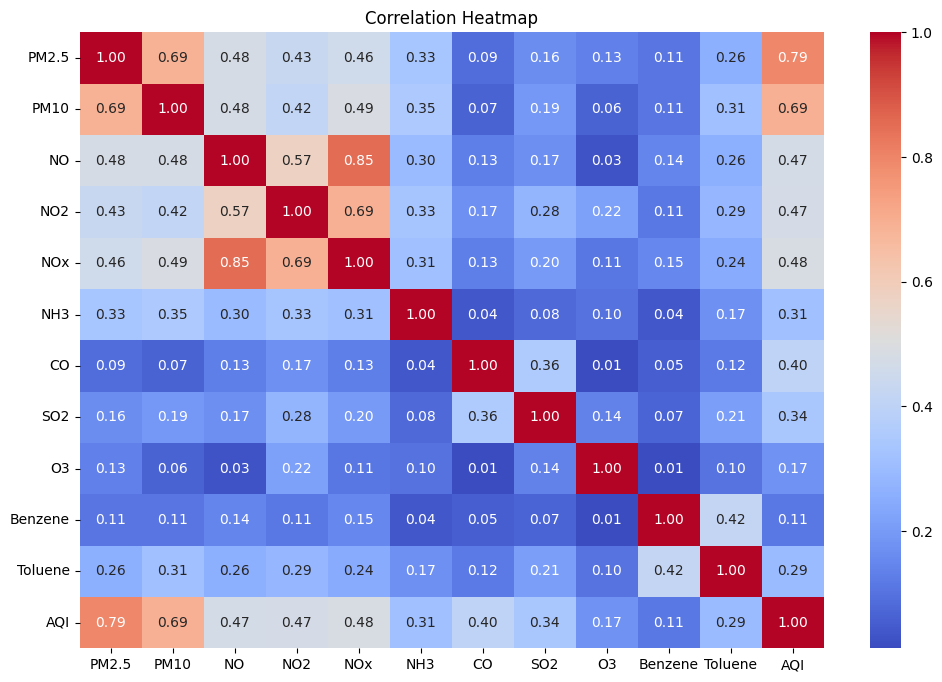

In [43]:
# Fix for correlation heatmap to handle non-numeric columns
def plot_correlation_heatmap(data):
    # Select only numeric columns for correlation
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    plt.figure(figsize=(12, 8))
    corr = numeric_data.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(data)


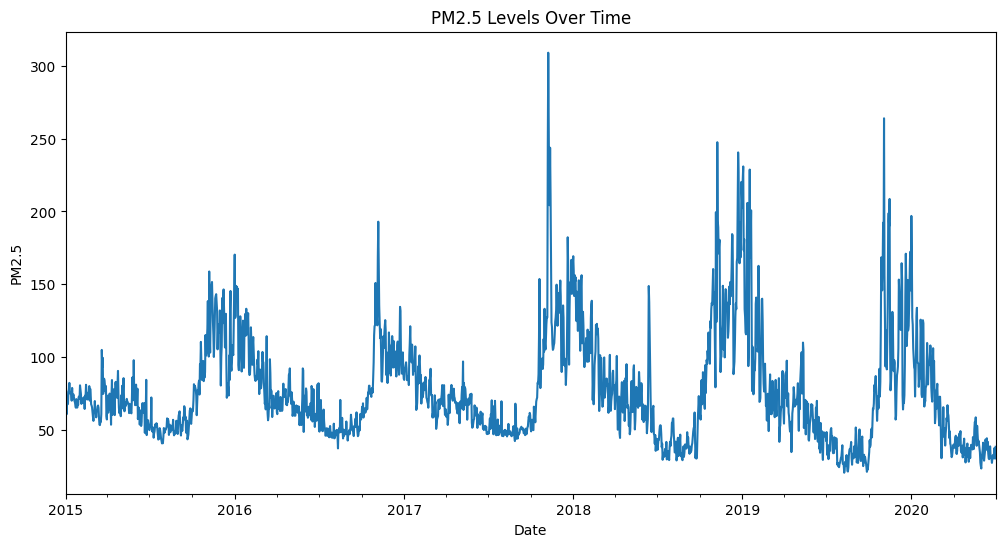

In [44]:

def plot_time_series(data, column, title):
    """Plots a time series for the specified column."""
    plt.figure(figsize=(12, 6))
    data.groupby('Date')[column].mean().plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.show()

plot_time_series(data, 'PM2.5', 'PM2.5 Levels Over Time')


# Prepare Data for Modeling


In [45]:
# Prepare Data for Modeling
def prepare_data(data):
    """Prepares features and target variables for training and testing."""
    features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']
    target = 'AQI'

    # Drop rows with missing values in features or target
    data = data.dropna(subset=features + [target])

    X = data[features]
    y = data[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = prepare_data(data)


# Train a Random Forest Model

In [46]:
def train_model(X_train, y_train):
    """Trains a Random Forest Regressor model."""
    model = RandomForestRegressor(random_state=42, n_estimators=100)
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)

# Evaluate the Model


In [47]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model_normalized(model, X_test, y_test):
    """Evaluates the model and prints normalized key metrics."""
    y_pred = model.predict(X_test)

    # Calculate raw metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate the range of the target variable
    y_range = np.max(y_test) - np.min(y_test)

    # Normalize metrics
    normalized_mae = mae / y_range
    normalized_mse = mse / (y_range ** 2)
    normalized_rmse = rmse / y_range

    # Print normalized metrics
    print("Mean Absolute Error (MAE):", normalized_mae)
    print("Mean Squared Error (MSE):", normalized_mse)
    print("Root Mean Squared Error (RMSE):", normalized_rmse)
    print("R-Squared (R2):", r2)  # No need to normalize as it is already between 0 and 1

evaluate_model_normalized(model, X_test, y_test)


Mean Absolute Error (MAE): 0.011009719777707073
Mean Squared Error (MSE): 0.0005203600343108809
Root Mean Squared Error (RMSE): 0.022811401410498238
R-Squared (R2): 0.8773358327644012


# Feature Importance

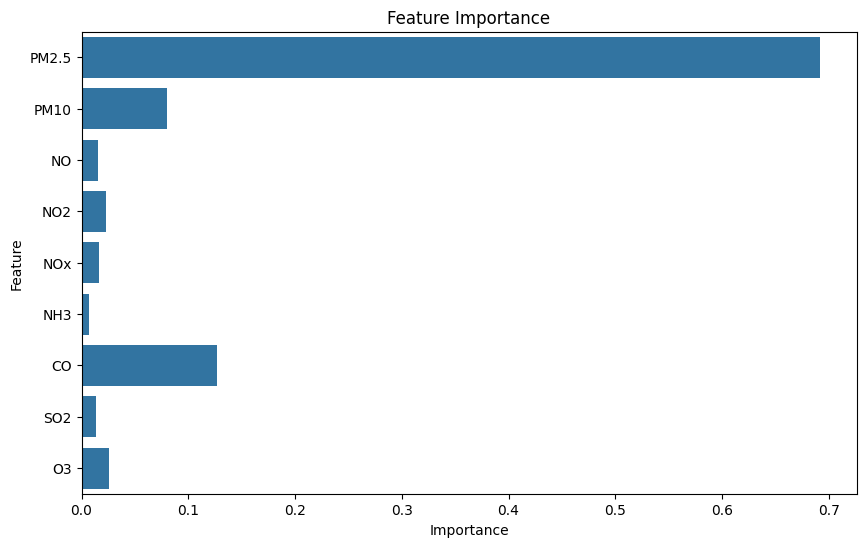

In [48]:
# Feature Importance
def plot_feature_importance(model, feature_names):
    """Plots feature importance for the trained model."""
    importance = model.feature_importances_
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance, y=feature_names)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

plot_feature_importance(model, X_train.columns)

In [49]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
def train_gradient_boosting_model(X_train, y_train):
    """Trains a Gradient Boosting Regressor model."""
    model = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)
    model.fit(X_train, y_train)
    return model

model_gb = train_gradient_boosting_model(X_train, y_train)

# Evaluate the model
def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints key metrics."""
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Normalize MSE to be between 0 and 1
    y_range = np.max(y_test) - np.min(y_test)
    normalized_mse = mse / (y_range ** 2)

    print("Mean Absolute Error (MAE):", mae)
    print("Normalized Mean Squared Error (MSE):", normalized_mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-Squared (R2):", r2)

evaluate_model(model_gb, X_test, y_test)


Mean Absolute Error (MAE): 23.38652092995267
Normalized Mean Squared Error (MSE): 0.0005772855285591037
Root Mean Squared Error (RMSE): 44.06509052865028
R-Squared (R2): 0.8639168192237467


In [50]:
from sklearn.linear_model import LinearRegression

def train_linear_regression_model(X_train, y_train):
    """Trains a Linear Regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model_lr = train_linear_regression_model(X_train, y_train)

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and prints key metrics."""
    y_pred = model.predict(X_test)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R-Squared (R2):", r2_score(y_test, y_pred))

evaluate_model(model_lr, X_test, y_test)


Mean Absolute Error (MAE): 33.108726215897526
Mean Squared Error (MSE): 3072.5674005841197
Root Mean Squared Error (RMSE): 55.430744182124414
R-Squared (R2): 0.784664051865287


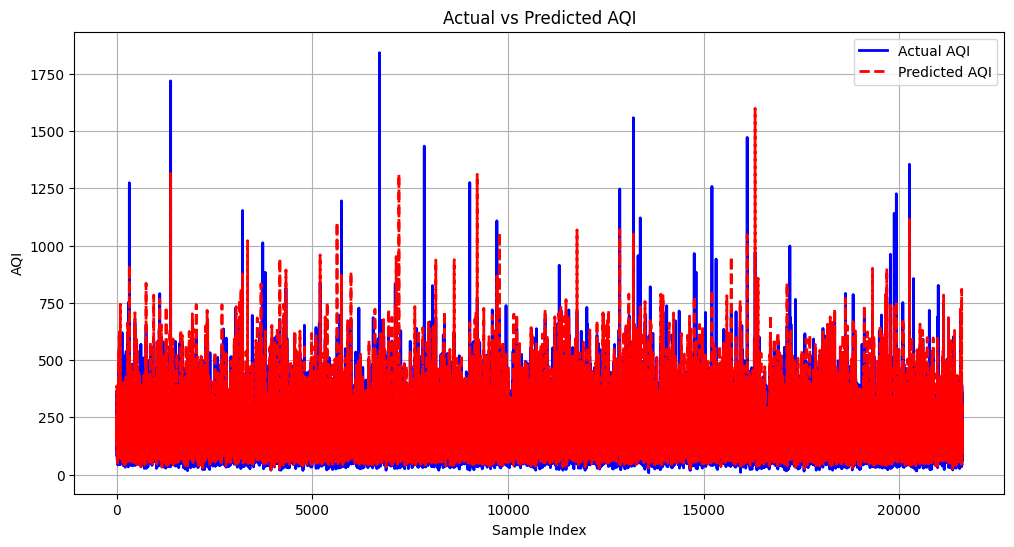

In [51]:
def visualize_actual_vs_predicted(y_test, y_pred):
    """Visualizes actual vs predicted values as separate lines."""
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual AQI', color='blue', linewidth=2)
    plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted AQI', color='red', linestyle='--', linewidth=2)
    plt.title('Actual vs Predicted AQI')
    plt.xlabel('Sample Index')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function to visualize predictions
visualize_actual_vs_predicted(y_test, model_lr.predict(X_test))


# Save the Cleaned Data and Model

In [52]:
def save_outputs(data, model, data_path='cleaned_aqi_data.csv', model_path='aqi_prediction_model.pkl'):
    """Saves the cleaned dataset and trained model."""
    data.to_csv(data_path, index=False)
    joblib.dump(model, model_path)
    print("Cleaned data saved to:", data_path)
    print("Model saved to:", model_path)

save_outputs(data, model)

NameError: name 'joblib' is not defined

In [ ]:
import joblib
print("Pipeline complete: Data cleaning, visualization, modeling, and evaluation.")

In [ ]:
pip install gradio

In [ ]:
import gradio as gr
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('aqi_prediction_model.pkl')

# Define a function to make predictions using the trained model
def predict_aqi(PM2_5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3):
    """Predict AQI based on the input features using the trained model."""
    # Create a DataFrame with the input features
    input_data = pd.DataFrame([[PM2_5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3]],
                              columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3'])

    # Make the prediction using the model
    predicted_aqi = model.predict(input_data)[0]
    return predicted_aqi

# Define the Gradio interface with the new syntax
inputs = [
    gr.Number(label='PM2.5'),
    gr.Number(label='PM10'),
    gr.Number(label='NO'),
    gr.Number(label='NO2'),
    gr.Number(label='NOx'),
    gr.Number(label='NH3'),
    gr.Number(label='CO'),
    gr.Number(label='SO2'),
    gr.Number(label='O3')
]

outputs = gr.Textbox(label="Predicted AQI")

# Create the interface
gr.Interface(fn=predict_aqi, inputs=inputs, outputs=outputs, title="AQI Prediction",
             description="Enter the values of air pollutants to predict AQI").launch()
